<center>
  <span style="font-size: 24px; font-weight: bold;">
NOTEBOOK ANALYSE DES MOTS   
  </span>
</center>



*** 
**Ia/ Chargement des librairies**
***

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from wordcloud import WordCloud
import polars as pl
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib_venn import venn2

*** 
**Ib/ Chargement des chemins locaux**
***

In [57]:
df_recipe=pl.read_csv("./data/raw/RAW_recipes.csv")


df_interaction=pl.read_csv("./data/raw/RAW_interactions.csv")


*** 
**Ic/ Compréhension initiale des données**
***

In [58]:
df_interaction.head()

user_id,recipe_id,date,rating,review
i64,i64,str,i64,str
38094,40893,"""2003-02-17""",4,"""Great with a salad. Cooked on …"
1293707,40893,"""2011-12-21""",5,"""So simple, so delicious! Great…"
8937,44394,"""2002-12-01""",4,"""This worked very well and is E…"
126440,85009,"""2010-02-27""",5,"""I made the Mexican topping and…"
57222,85009,"""2011-10-01""",5,"""Made the cheddar bacon topping…"


In [59]:
df_recipe.head()

name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
str,i64,i64,i64,str,str,str,i64,str,str,str,i64
"""arriba baked winter squash m…",137739,55,47892,"""2005-09-16""","""['60-minutes-or-less', 'time-t…","""[51.5, 0.0, 13.0, 0.0, 2.0, 0.…",11,"""['make a choice and proceed wi…","""autumn is my favorite time of …","""['winter squash', 'mexican sea…",7
"""a bit different breakfast piz…",31490,30,26278,"""2002-06-17""","""['30-minutes-or-less', 'time-t…","""[173.4, 18.0, 0.0, 17.0, 22.0,…",9,"""['preheat oven to 425 degrees …","""this recipe calls for the crus…","""['prepared pizza crust', 'saus…",6
"""all in the kitchen chili""",112140,130,196586,"""2005-02-25""","""['time-to-make', 'course', 'pr…","""[269.8, 22.0, 32.0, 48.0, 39.0…",6,"""['brown ground beef in large p…","""this modified version of 'mom'…","""['ground beef', 'yellow onions…",13
"""alouette potatoes""",59389,45,68585,"""2003-04-14""","""['60-minutes-or-less', 'time-t…","""[368.1, 17.0, 10.0, 2.0, 14.0,…",11,"""['place potatoes in a large po…","""this is a super easy, great ta…","""['spreadable cheese with garli…",11
"""amish tomato ketchup for can…",44061,190,41706,"""2002-10-25""","""['weeknight', 'time-to-make', …","""[352.9, 1.0, 337.0, 23.0, 3.0,…",5,"""['mix all ingredients& boil fo…","""my dh's amish mother raised hi…","""['tomato juice', 'apple cider …",8



*** 
**II/ Analyse étude comparée**
***

/tmp/ipykernel_84993/398781253.py:17: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("contributions"))


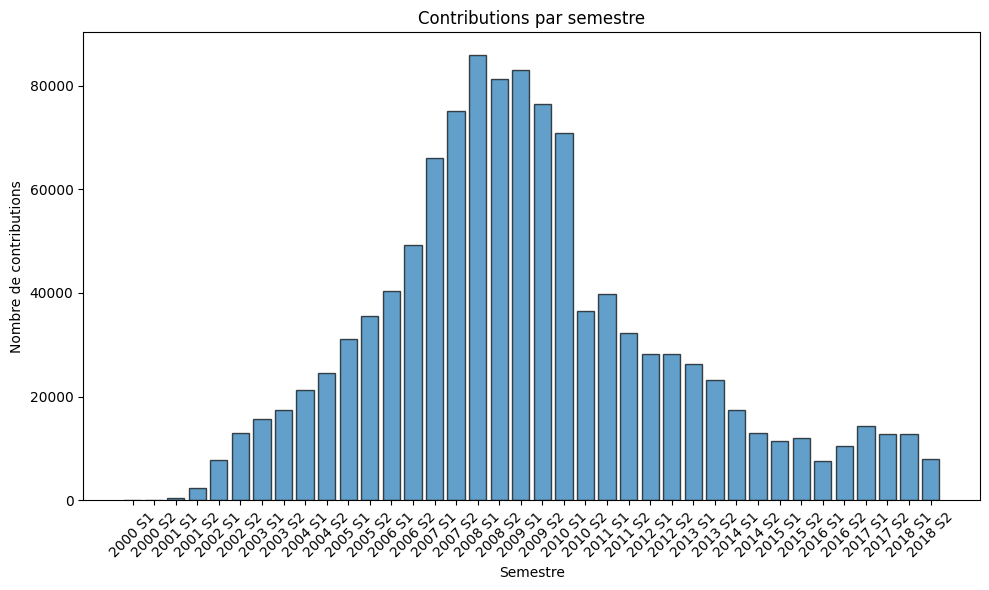

In [60]:
df_interaction = df_interaction.with_columns(
    pl.col("date").str.strptime(pl.Date, "%Y-%m-%d", strict=False)  # Conversion en date
)

df_interaction = df_interaction.with_columns([
    pl.col("date").dt.year().alias("year"),
    ((pl.col("date").dt.month() - 1) // 6 + 1).alias("semester")
])

df_interaction = df_interaction.with_columns(
    (pl.col("year").cast(pl.Utf8) + " S" + pl.col("semester").cast(pl.Utf8)).alias("year_semester")
)

semester_counts = (
    df_interaction
    .group_by("year_semester")
    .agg(pl.count().alias("contributions"))
    .sort("year_semester")
)

labels = semester_counts["year_semester"].to_list()
counts = semester_counts["contributions"].to_list()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, edgecolor='black', alpha=0.7)
plt.title("Contributions par semestre")
plt.xlabel("Semestre")
plt.ylabel("Nombre de contributions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*** 
**III/ Analyse de mots par la frequence brute et du TF-IDF**
***


**1.a/ Analyse de mot dans les recettes les plus commentées -- fréquence brute**


In [61]:
# 1. Compter le nombre de reviews par recette
reviews_count = (
    df_interaction
    .group_by("recipe_id")
    .agg(pl.count().alias("review_count"))
    .sort("review_count", descending=True)
)

# 2. Afficher les 10 recettes avec le plus de reviews
print(reviews_count.head(10))

# 3. Sélectionner les 10 recettes les plus commentées
top_recipes = reviews_count.head(20)

# 4. Extraire les IDs des recettes
top_recipe_ids = top_recipes["recipe_id"].to_list()

# 5. Filtrer les reviews des 10 recettes les plus commentées
reviews_top = df_interaction.filter(
    pl.col("recipe_id").is_in(top_recipe_ids)
)

# 6. Extraire les textes des reviews sous forme de liste
texts_top = reviews_top["review"].to_list()




shape: (10, 2)
┌───────────┬──────────────┐
│ recipe_id ┆ review_count │
│ ---       ┆ ---          │
│ i64       ┆ u32          │
╞═══════════╪══════════════╡
│ 2886      ┆ 1613         │
│ 27208     ┆ 1601         │
│ 89204     ┆ 1579         │
│ 39087     ┆ 1448         │
│ 67256     ┆ 1322         │
│ 54257     ┆ 1305         │
│ 22782     ┆ 1234         │
│ 32204     ┆ 1220         │
│ 69173     ┆ 997          │
│ 68955     ┆ 904          │
└───────────┴──────────────┘


/tmp/ipykernel_84993/2331159800.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("review_count"))


In [62]:
#prétraitement à sauver avant
# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Définir les stop words
stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)
stop_words.update(['recipe','thank','instead','minute','hour','I','water','bit','definitely','thing','half','way','like'])

def clean_text(text):
    if isinstance(text, str) and pd.notna(text):
        doc = nlp(text.lower())
        words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words and token.pos_ !="VERB"]
        return words
    return []

# Appliquer le nettoyage à tous les textes des reviews
cleaned_texts_top = []
for text in texts_top:
    cleaned_texts_top.extend(clean_text(text))


In [63]:
# Compter les occurrences des mots nettoyés
word_counts_top = Counter(cleaned_texts_top)

# Afficher les 50 mots les plus fréquents
most_common_words_top = word_counts_top.most_common(100)

print("Mots les plus fréquents dans les reviews des 50 recettes les plus commentées :")
print(most_common_words_top)


Mots les plus fréquents dans les reviews des 50 recettes les plus commentées :
[('good', 8204), ('time', 6096), ('great', 5582), ('sauce', 5205), ('chicken', 5136), ('easy', 4399), ('delicious', 3616), ('banana', 2974), ('little', 2683), ('cheese', 2611), ('cup', 2553), ('cream', 2461), ('family', 2347), ('bread', 2345), ('flavor', 2312), ('cake', 2258), ('moist', 1924), ('garlic', 1796), ('husband', 1784), ('onion', 1746), ('wonderful', 1697), ('perfect', 1675), ('roast', 1527), ('review', 1502), ('dish', 1467), ('pepper', 1423), ('sugar', 1419), ('meat', 1375), ('pot', 1363), ('pan', 1315), ('meatloaf', 1315), ('yummy', 1248), ('butter', 1244), ('beef', 1235), ('taste', 1225), ('amazing', 1130), ('oven', 1109), ('tasty', 1106), ('sure', 1100), ('excellent', 1098), ('dinner', 1091), ('day', 1085), ('meatball', 1083), ('mix', 1081), ('seasoning', 1078), ('extra', 1072), ('exactly', 1062), ('keeper', 1057), ('awesome', 1054), ('leftover', 1041), ('star', 1013), ('brownie', 1011), ('toma

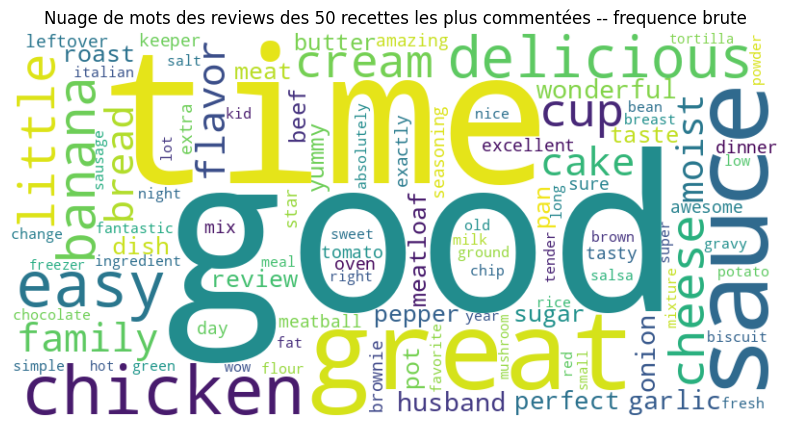

In [64]:
# Générer le nuage de mots
word_freq_top = dict(most_common_words_top)
wordcloud_top = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_top)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 50 recettes les plus commentées -- frequence brute")
plt.show()


**1.b/ Analyse de mot dans les recettes les plus commentées -- TF-IDF**

In [65]:
# Nettoyer chaque review et la reconstituer en chaîne de caractères
cleaned_reviews_top = [" ".join(clean_text(text)) for text in texts_top]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # Limiter au top 1000 mots
    stop_words='english',  # Optionnel : filtrer les stop words anglais
    ngram_range=(1, 2)  # Optionnel : inclure les bigrams (ex: "very good")
)

# Appliquer TF-IDF aux reviews nettoyées
tfidf_matrix_top = vectorizer.fit_transform(cleaned_reviews_top)

# Récupérer les noms des features (mots)
feature_names = vectorizer.get_feature_names_out()
# Calculer la somme des scores TF-IDF pour chaque mot
tfidf_scores_top = tfidf_matrix_top.sum(axis=0).A1

# Créer un DataFrame pour visualiser les résultats
tfidf_df_top = pd.DataFrame({
    "word": feature_names,
    "tfidf_score": tfidf_scores_top
}).sort_values("tfidf_score", ascending=False)

# Générer le nuage de mots
word_freq_idftop = dict(zip(tfidf_df_top["word"], tfidf_df_top["tfidf_score"]))

wordcloud_idftop = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_top)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))/
plt.imshow(wordcloud_idftop, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 20 recettes les plus commentées -- TFIDF")
plt.show()

SyntaxError: invalid syntax (4202962626.py, line 31)

**1.c/ Comparatif des deux méthodes**

In [ ]:
# Mots les plus fréquents par fréquence brute
word_counts_top = Counter([word for text in cleaned_reviews_top for word in text.split()])
most_common_words_top = word_counts_top.most_common(50)
freq_words_top = [word for word, _ in most_common_words_top[:20]]

# Top mots TF-IDF
tfidf_words_top = tfidf_df_top["word"].head(50).tolist()

print("\nComparaison :")
print("Top 20 mots fréquents :", [word for word, count in most_common_words_top[:20]])
print("Top 20 mots TF-IDF :", tfidf_df_top["word"].head(20).tolist())


In [ ]:

plt.figure(figsize=(8, 6))
venn2(
    [set(freq_words_top), set(tfidf_words_top)],
    ("Fréquence brute", "TF-IDF"),
    set_colors=("skyblue", "salmon"),
    alpha=0.7
)
plt.title("Comparaison des mots clés pour les recettes les plus commentées: Fréquence brute vs TF-IDF")
plt.show()

**2.a/ Analyse de mot dans les recettes les plus commentées et mieux notées -- frequence brute**

In [ ]:
# 1. Compter le nombre total de reviews par recette
reviews_count_all = (
    df_interaction
    .group_by("recipe_id")
    .agg(pl.count().alias("total_review_count"))
)

# 2. Calculer la note moyenne par recette
avg_rating = (
    df_interaction
    .group_by("recipe_id")
    .agg(pl.col("rating").mean().alias("avg_rating"))
)

# 3. Fusionner les deux DataFrames (join en Polars)
recipe_stats = reviews_count_all.join(
    avg_rating,
    on="recipe_id",
    how="inner"
)

# 4. Filtrer les recettes avec une note moyenne de 5/5
top_rated_recipes = recipe_stats.filter(
    pl.col("avg_rating") == 5.0
)

# 5. Trier par nombre total de reviews (du plus grand au plus petit)
top_rated_and_reviewed = top_rated_recipes.sort(
    "total_review_count",
    descending=True
)

# 6. Afficher les 10 recettes les plus commentées ET notées 5/5
print(top_rated_and_reviewed.head(10))

# 7. Sélectionner les 10 recettes les plus commentées et notées 5/5
top_rated_and_reviewed_recipe_ids = (
    top_rated_and_reviewed
    .head(10)["recipe_id"]
    .to_list()
)

# 8. Filtrer le DataFrame original pour obtenir uniquement les reviews de ces recettes (note 5/5)
reviews_top_rated_and_reviewed = df_interaction.filter(
    (pl.col("recipe_id").is_in(top_rated_and_reviewed_recipe_ids)) &
    (pl.col("rating") == 5.0)
)

# 9. Extraire les textes des reviews
texts_top_rated_and_reviewed = reviews_top_rated_and_reviewed["review"].to_list()


In [ ]:
# Appliquer le nettoyage à tous les textes des reviews
cleaned_texts_top_reviews = []
for text in texts_top_rated_and_reviewed:
    cleaned_texts_top_reviews.extend(clean_text(text))

In [ ]:
# Compter les occurrences des mots nettoyés
word_counts_top_review = Counter(cleaned_texts_top_review)

# Afficher les 50 mots les plus fréquents
most_common_words_top_review = word_counts_top_review.most_common(100)

print("Mots les plus fréquents dans les 50 recettes les mieux notés et plus commentées :")
print(most_common_words_top_review)

In [ ]:
# Générer le nuage de mots
word_freqbrut_top_review = dict(most_common_words_top_review)
wordcloud_top_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqbrut_top_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top_review, interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus fréquents dans les 50 recettes les mieux notés et plus commentées :")
plt.show()

**2.b/ Analyse de mot dans les recettes les plus commentées et mieux notées -- TF-IDF**

In [ ]:
# Nettoyer chaque review et la reconstituer en chaîne de caractères
cleaned_top_reviews = [" ".join(clean_text(text)) for text in texts_top_rated_and_reviewed]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # Limiter au top 1000 mots
    stop_words='english',  # Optionnel : filtrer les stop words anglais
    ngram_range=(1, 2)  # Optionnel : inclure les bigrams (ex: "very good")
)

# Appliquer TF-IDF aux reviews nettoyées
tfidf_matrix_top_review = vectorizer.fit_transform(cleaned_reviews)

# Récupérer les noms des features (mots)
feature_names = vectorizer.get_feature_names_out()
# Calculer la somme des scores TF-IDF pour chaque mot
tfidf_scores_top_review = tfidf_matrix_top_review.sum(axis=0).A1

# Créer un DataFrame pour visualiser les résultats
tfidf_df_top_review = pd.DataFrame({
    "word": feature_names,
    "tfidf_score": tfidf_scores_top_review
}).sort_values("tfidf_score", ascending=False)
# Générer le nuage de mots
word_freq_idf_top_review = dict(zip(tfidf_df_top_review["word"], tfidf_df_top_review["tfidf_score"]))

wordcloud_idf_top_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_idf_top_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_idf_top_review, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 20 recettes les plus commentées")
plt.show()

**2.c/ Comparatif des deux méthodes**

In [ ]:
# Mots les plus fréquents par fréquence brute
word_counts_top_reviews = Counter([word for text in cleaned_top_reviews for word in text.split()])
most_common_words_top_review = word_counts_top_reviews.most_common(50)
freq_words_top_review = [word for word, _ in most_common_words_top_review[:50]]

# Top mots TF-IDF
tfidf_words_top_review = tfidf_df_top_review["word"].head(50).tolist()

print("\nComparaison :")
print("Top 20 mots fréquents :", [word for word, count in most_common_words_top_review[:50]])
print("Top 20 mots TF-IDF :", tfidf_words_top_review)


In [ ]:
plt.figure(figsize=(8, 6))
venn2(
    [set(freq_words_top_review), set(tfidf_words_top_review)],
    ("Fréquence brute", "TF-IDF"),
    set_colors=("skyblue", "salmon"),
    alpha=0.7
)
plt.title("Comparaison des mots clés pour les recettes les plus commentées: Fréquence brute vs TF-IDF")
plt.show()

**3.a/ Analyse de mot dans les recettes les plus commentées et moins bien notées -- frequence brute**

In [ ]:
# Tout en une chaîne pour les IDs et les textes
bad_rated_and_reviewed_recipe_ids = (
    df_interaction
    .group_by("recipe_id")
    .agg([
        pl.count().alias("total_review_count"),
        pl.col("rating").mean().alias("avg_rating")
    ])
    .sort("total_review_count", descending=True)
    .filter(pl.col("avg_rating") == 0.0)
    .head(50)["recipe_id"]
    .to_list()
)

texts_bad_rated_and_reviewed = (
    df_interaction
    .filter(
        (pl.col("recipe_id").is_in(bad_rated_and_reviewed_recipe_ids)) &
        (pl.col("rating") == 0.0)
    )
    ["review"]
    .to_list()
)

# Affichage des 10 premières recettes sélectionnées
print("Recettes sélectionnées (ID, nombre total de reviews, note moyenne) :")
print(
    df_interaction
    .group_by("recipe_id")
    .agg([
        pl.count().alias("total_review_count"),
        pl.col("rating").mean().alias("avg_rating")
    ])
    .sort("total_review_count", descending=True)
    .filter(pl.col("avg_rating") == 0.0)
    .head(10)
)

print(f"\nNombre de reviews notées 0/5 extraites : {len(texts_bad_rated_and_reviewed)}")


In [ ]:
# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Définir les stop words
stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)
stop_words.update(['recipe','thank','think','instead','minute','hour','I','water','bit','definitely','thing','half','way','sure'])

def clean_text(text):
    if isinstance(text, str) and pd.notna(text):
        doc = nlp(text.lower())
        words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words and token.pos_ !="VERB"]
        return words
    return []

# Appliquer le nettoyage à tous les textes des reviews
cleaned_texts_bad_rated_and_reviewed = []
for text in texts_bad_rated_and_reviewed:
    cleaned_texts_bad_rated_and_reviewed.extend(clean_text(text))

In [ ]:
# Compter les occurrences des mots nettoyés
word_counts_bad_rated_and_reviewed = Counter(cleaned_texts_bad_rated_and_reviewed)

# Afficher les 100 mots les plus fréquents
most_common_words_bad_rated_and_reviewed= word_counts_bad_rated_and_reviewed.most_common(100)

print("Mots les plus fréquents dans les 50 recettes les moins bien notés et plus commentées :")
print(most_common_words_bad_rated_and_reviewed)

In [ ]:

# Générer le nuage de mots
word_freqbrut_bad_review = dict(most_common_words_bad_rated_and_reviewed)
wordcloudbrut_bad_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqbrut_bad_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudbrut_bad_review , interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus fréquents dans les 100 recettes les moins bien notés et plus commentées :")
plt.show()

**3.b/ Analyse de mot dans les recettes les plus commentées et moins bien notées -- TF-IDF**

In [ ]:
# Nettoyer chaque review et la reconstituer en chaîne de caractères
cleaned_bad_review = [" ".join(clean_text(text)) for text in texts_bad_rated_and_reviewed ]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # Limiter au top 1000 mots
    stop_words='english',  # Optionnel : filtrer les stop words anglais
    ngram_range=(1, 2)  # Optionnel : inclure les bigrams (ex: "very good")
)

# Appliquer TF-IDF aux reviews nettoyées
tfidf_matrix_bad_review = vectorizer.fit_transform(cleaned_bad_review)

# Récupérer les noms des features (mots)
feature_names = vectorizer.get_feature_names_out()
# Calculer la somme des scores TF-IDF pour chaque mot
tfidf_scores_bad_review = tfidf_matrix_bad_review.sum(axis=0).A1

# Créer un DataFrame pour visualiser les résultats
tfidf_df_bad_review = pd.DataFrame({
    "word": feature_names,
    "tfidf_score": tfidf_scores_bad_review
}).sort_values("tfidf_score", ascending=False)
# Générer le nuage de mots
word_freq_idf_bad_review = dict(zip(tfidf_df_bad_review ["word"], tfidf_df_bad_review["tfidf_score"]))

wordcloud_idf_bad_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_idf_bad_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_idf_bad_review, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 20 recettes les moins bien notées et les plus commentées")
plt.show()

**3.c/ Comparatif des deux méthodes**

In [ ]:
# Mots les plus fréquents

freq_word_bad_review = [word for word, _ in word_counts_bad_review.most_common(100)]

# Top mots TF-IDF
tfidf_word_bad_review = tfidf_df_bad_review["word"].head(100).tolist()

print("\nComparaison :")
print("Top 10 mots fréquents :", freq_word_bad_review [:20])
print("Top 10 mots TF-IDF :", tfidf_df_bad_review["word"].head(20).tolist())

In [ ]:
plt.figure(figsize=(8, 6))
venn2(
    [set(freq_word_bad_review), set(tfidf_word_bad_review)],
    ("Fréquence brute", "TF-IDF"),
    set_colors=("skyblue", "salmon"),
    alpha=0.7
)
plt.title("Comparaison des mots clés pour les recettes les plus commentées: Fréquence brute vs TF-IDF")
plt.show()

**IV/ Affichage des ingrédients les plus utilisés dans les recettes**

In [ ]:

# Liste des ingrédients à exclure
excluded_ingredients = ["salt", "water", "oil", "sugar", "pepper", "butter", "flour", "salt and pepper","olive oil","vegetable oil","all-purpose flour"]

# Nettoyage et explosion
ingredients_cleaned = (
    df_recipe
    .with_columns(
        pl.col("ingredients")
        .str.replace_all(r"[\[\]\"]", "")
        .str.replace_all("'", "")
        .alias("cleaned_ingredients")
    )
    .select(
        pl.col("cleaned_ingredients")
        .str.split(", ")
        .explode()
        .alias("ingredient")
    )
    .filter(
        (pl.col("ingredient") != "") &
        (~pl.col("ingredient").is_in(excluded_ingredients))
    )
)

# Compter les occurrences
ingredient_counts = (
    ingredients_cleaned
    .group_by("ingredient")
    .agg(pl.count().alias("count"))
    .sort("count", descending=True)
    .head(30)
)

# Préparer les données pour le diagramme polaire
ingredients = ingredient_counts["ingredient"].to_list()
counts = ingredient_counts["count"].to_list()

# Fermer le cercle
angles = np.linspace(0, 2 * np.pi, len(ingredients), endpoint=False).tolist()
angles += angles[:1]
counts += counts[:1]

# Tracer le diagramme polaire
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.fill(angles, counts, color='skyblue', alpha=0.4)
ax.plot(angles, counts, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(ingredients, rotation=45, ha='right')
ax.tick_params(axis='x', pad=30,labelsize=8,rotation=350)
ax.set_title('Top 20 des ingrédients les plus utilisés', pad=30)
plt.yticks([5000, 10000, 20000, 30000, 40000], ["5000", "10000", "20000", "30000", "40000"])
plt.tight_layout()
plt.show()

In [ ]:
ingredient_counts.head(30)


In [ ]:
import polars as pl
from sklearn.preprocessing import StandardScaler

# Aggrégation des données par user_id
user_features = (
    df_interaction
    .group_by("user_id")
    .agg([
        pl.col("rating").mean().alias("avg_rating"),
        pl.col("rating").std().alias("std_rating"),
        pl.len().alias("n_reviews"),
    ])
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorisation TF-IDF des commentaires
tfidf = TfidfVectorizer(max_features=50, stop_words="english")
tfidf_matrix = tfidf.fit_transform(df_interaction["review"])

# Aggrégation des vecteurs TF-IDF par utilisateur (moyenne)
user_tfidf = (
    pl.DataFrame(tfidf_matrix.toarray(), schema=[f"tfidf_{i}" for i in range(50)])
    .with_columns(pl.Series("user_id", df_interaction["user_id"]))
    .group_by("user_id")
    .agg([pl.col(f"tfidf_{i}").mean() for i in range(50)])
)

# Fusion avec les autres caractéristiques
user_matrix = user_features.join(user_tfidf, on="user_id", how="left")
user_matrix = user_matrix.fill_null(0)


In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(user_matrix.drop("user_id").to_pandas())


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir k")
plt.show()


In [ ]:
k = 3  # Exemple
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
user_matrix = user_matrix.with_columns(pl.Series("cluster", kmeans.labels_))


In [66]:
import polars as pl
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans  # plus rapide que KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Conversion des dates
df_interaction = df_interaction.with_columns(
    pl.col("date").cast(pl.Utf8).str.strptime(pl.Datetime, "%Y-%m-%d")
).with_columns(
    pl.col("date").dt.timestamp("ms").alias("timestamp")
)

# 2. Caractéristiques temporelles de base
user_time_features = (
    df_interaction
    .group_by("user_id")
    .agg([
        pl.len().alias("n_reviews"),
        pl.col("timestamp").min().alias("first_review"),
        pl.col("timestamp").max().alias("last_review"),
    ])
    .with_columns(
        ((pl.col("last_review") - pl.col("first_review")) / (1000 * 60 * 60 * 24)).alias("activity_duration")
    )
    .with_columns(
        (pl.col("n_reviews") / ((pl.col("activity_duration") + 1) / 30)).alias("reviews_per_month")
    )
)

# 3. Extraire jours et mois
df_interaction = df_interaction.with_columns([
    pl.col("date").dt.weekday().alias("weekday"),
    pl.col("date").dt.month().alias("month"),
])

# 4. Calcul des intervalles entre reviews
df_sorted = df_interaction.sort(["user_id", "date"])
df_sorted = df_sorted.with_columns(
    (pl.col("date").diff().dt.total_days().over("user_id")).alias("interval_days")
)

# 5. Agrégation vectorisée
user_time_stats = (
    df_sorted.group_by("user_id")
    .agg([
        pl.col("weekday").mode().alias("favorite_weekday"),
        pl.col("month").mode().alias("favorite_month"),
        pl.col("interval_days").mean().fill_null(0).alias("review_interval_mean"),
        pl.col("interval_days").std().fill_null(0).alias("review_interval_std"),
    ])
    .with_columns(
        (1 / (1 + pl.col("review_interval_std"))).alias("activity_regularity")
    )
)

# 6. Fusion
user_time_features = user_time_features.join(user_time_stats, on="user_id", how="left")

# 7. Encodage cyclique
user_time_features = user_time_features.with_columns([
    (pl.col("favorite_weekday").cast(pl.Float64) / 7 * 2 * np.pi).sin().alias("weekday_sin"),
    (pl.col("favorite_weekday").cast(pl.Float64) / 7 * 2 * np.pi).cos().alias("weekday_cos"),
    (pl.col("favorite_month").cast(pl.Float64) / 12 * 2 * np.pi).sin().alias("month_sin"),
    (pl.col("favorite_month").cast(pl.Float64) / 12 * 2 * np.pi).cos().alias("month_cos"),
])

# 8. Nettoyage
user_time_features = user_time_features.with_columns([
    pl.col("reviews_per_month").fill_nan(0),
    pl.col("review_interval_mean").fill_nan(0),
    pl.col("review_interval_std").fill_nan(0),
    pl.col("activity_regularity").fill_nan(0),
])

# 9. Sélection des colonnes
time_columns = [
    "n_reviews", "activity_duration", "reviews_per_month",
    "review_interval_mean", "review_interval_std", "activity_regularity",
    "weekday_sin", "weekday_cos", "month_sin", "month_cos"
]

# 10. Normalisation
scaler = StandardScaler()
X = scaler.fit_transform(user_time_features.select(time_columns).to_numpy())

# 11. Méthode du coude + silhouette
k_range = range(2, 8)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1024)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

# 12. Visualisation : courbes pour choisir k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title("Méthode du coude (Inertie)")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Score de silhouette")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# 13. Choix du k optimal
best_k = k_range[np.argmax(silhouette_scores)]
print(f"\n✅ k optimal = {best_k} (silhouette = {max(silhouette_scores):.4f})")

# 14. Clustering final
kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=1024)
labels = kmeans.fit_predict(X)
user_time_features = user_time_features.with_columns(pl.Series("cluster", labels))

# 15. Résumé des clusters
cluster_summary = (
    user_time_features
    .group_by("cluster")
    .agg([
        pl.col("n_reviews").mean().alias("moyenne_reviews"),
        pl.col("activity_duration").mean().alias("duree_activite_moyenne"),
        pl.col("reviews_per_month").mean().alias("reviews_par_mois"),
        pl.col("review_interval_mean").mean().alias("intervalle_moyen_jours"),
        pl.col("review_interval_std").mean().alias("ecart_type_intervalle"),
        pl.col("activity_regularity").mean().alias("regularite"),
        pl.len().alias("nombre_utilisateurs"),
    ])
)
print("\nRésumé des clusters :")
print(cluster_summary)

# 16. Visualisation PCA rapide
if len(X) > 5000:
    idx = np.random.choice(len(X), 5000, replace=False)
    X_vis = X[idx]
    labels_vis = labels[idx]
else:
    X_vis = X
    labels_vis = labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vis)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_vis, cmap='viridis', s=40)
plt.title(f"Visualisation des clusters (PCA, k={best_k})")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()


InvalidOperationError: cannot cast List type (inner: 'Int8', to: 'Float64')